In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [59]:
# Load the data
file_path = "/Users/chaahatamesar/Desktop/Uni-Assist Documents/TU Dortmond/ant_sandwich_data.csv"
df = pd.read_csv(file_path)

In [60]:
# Display basic information about the dataframe
print("DataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   antCount  48 non-null     int64 
 1   bread     48 non-null     object
 2   topping   48 non-null     object
 3   butter    48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB
None


In [61]:
# Display the first few rows of the dataframe
print("\nDataFrame Head:")
plt.savefig('df_head.png')
(df.head())


DataFrame Head:


,antCount,bread,topping,butter
0,34,Rye,Ham and gherkins,no
1,47,Multi Grain,Peanut butter,yes
2,67,White,Ham and gherkins,yes
3,63,Multi Grain,Ham and gherkins,yes
4,65,Rye,Ham and gherkins,no


<Figure size 432x288 with 0 Axes>

In [62]:
# Display descriptive statistics for 'antCount'
print("\nDescriptive Statistics for antCount:")
(df['antCount'].describe())


Descriptive Statistics for antCount:


count    48.000000
mean     43.500000
std      15.148906
min      18.000000
25%      30.500000
50%      43.000000
75%      57.000000
max      76.000000
Name: antCount, dtype: float64

In [63]:
# Perform descriptive analysis - group by factors and calculate mean, median, std
desc_bread = df.groupby('bread')['antCount'].agg(['mean', 'median', 'std']).sort_values(by='mean', ascending=False)
desc_topping = df.groupby('topping')['antCount'].agg(['mean', 'median', 'std']).sort_values(by='mean', ascending=False)
desc_butter = df.groupby('butter')['antCount'].agg(['mean', 'median', 'std']).sort_values(by='mean', ascending=False)

In [64]:
print("\nDescriptive Statistics by Bread Type:")
print(desc_bread)
print("\nDescriptive Statistics by Topping:")
print(desc_topping)
print("\nDescriptive Statistics by Butter:")
print(desc_butter)


Descriptive Statistics by Bread Type:
              mean  median        std
bread                                
Whole Grain  44.50    48.0  14.606972
Rye          44.25    42.0  13.396913
Multi Grain  43.00    40.0  18.230843
White        42.25    44.5  15.863767

Descriptive Statistics by Topping:
                    mean  median        std
topping                                    
Ham and gherkins  55.500    58.5  12.055428
Peanut butter     40.375    44.5  14.183911
Yeast spread      34.625    34.5  11.158704

Descriptive Statistics by Butter:
          mean  median        std
butter                           
yes     48.875    49.0  14.513300
no      38.125    37.0  14.072213


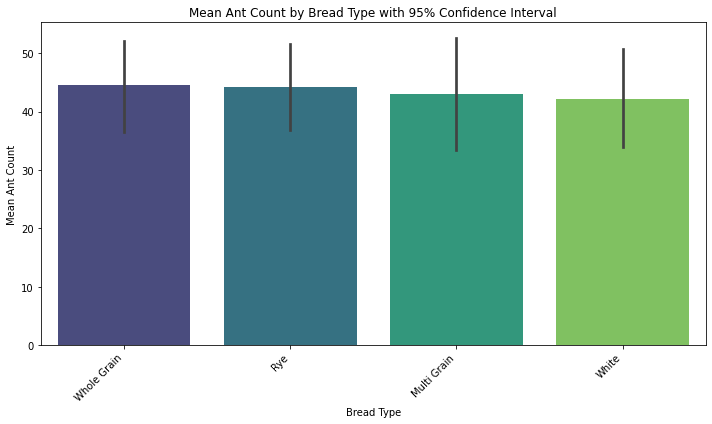

In [65]:
# Generate plots for descriptive analysis
# Bar plot for Bread Type
plt.figure(figsize=(10, 6))
sns.barplot(x='bread', y='antCount', data=df, estimator=np.mean, ci=95, palette='viridis', order=desc_bread.index)
plt.title('Mean Ant Count by Bread Type with 95% Confidence Interval')
plt.xlabel('Bread Type')
plt.ylabel('Mean Ant Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mean_ant_count_by_bread_type.png')
plt.show()
plt.close()

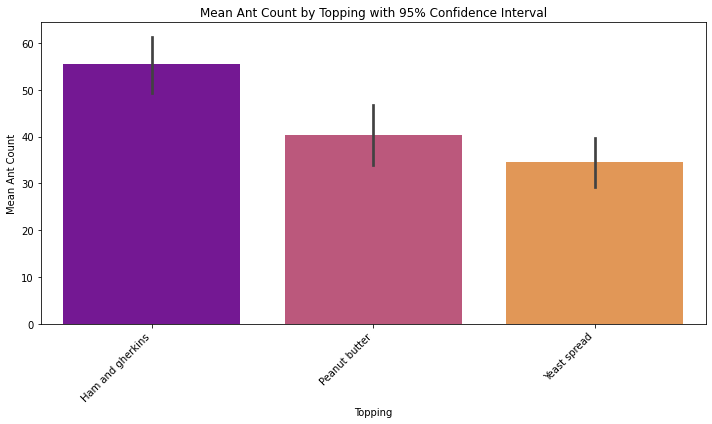

In [66]:
# Bar plot for Topping
plt.figure(figsize=(10, 6))
sns.barplot(x='topping', y='antCount', data=df, estimator=np.mean, ci=95, palette='plasma', order=desc_topping.index)
plt.title('Mean Ant Count by Topping with 95% Confidence Interval')
plt.xlabel('Topping')
plt.ylabel('Mean Ant Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mean_ant_count_by_topping.png')
plt.show()
plt.close()

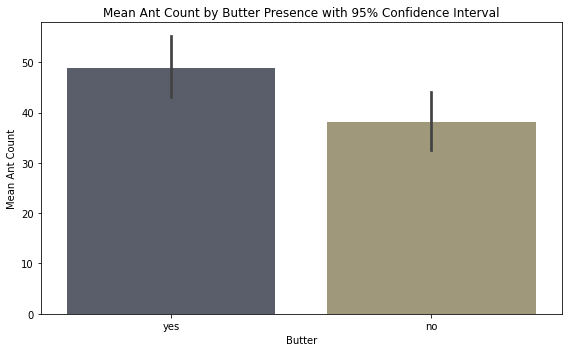

In [67]:
# Bar plot for Butter
plt.figure(figsize=(8, 5))
sns.barplot(x='butter', y='antCount', data=df, estimator=np.mean, ci=95, palette='cividis', order=desc_butter.index)
plt.title('Mean Ant Count by Butter Presence with 95% Confidence Interval')
plt.xlabel('Butter')
plt.ylabel('Mean Ant Count')
plt.tight_layout()
plt.savefig('mean_ant_count_by_butter.png')
plt.show()
plt.close()

In [68]:
# Perform Three-Way ANOVA
# The formula specifies the dependent variable ('antCount') and independent variables ('bread', 'topping', 'butter')
# and their interactions.
model = ols('antCount ~ C(bread) + C(topping) + C(butter) + \
             C(bread):C(topping) + C(bread):C(butter) + \
             C(topping):C(butter) + C(bread):C(topping):C(butter)', data=df).fit()
anova_table = anova_lm(model, typ=2) # Type 2 sum of squares suitable for unbalanced designs, if any.
print("\nANOVA Table:")
(anova_table)


ANOVA Table:


,sum_sq,df,F,PR(>F)
C(bread),40.50,3.0,0.142043,0.933761
C(topping),3720.50,2.0,19.572994,0.000009
C(butter),1386.75,1.0,14.590969,0.000830
C(bread):C(topping),577.00,6.0,1.011837,0.440987
C(bread):C(butter),378.75,3.0,1.328365,0.288413
C(topping):C(butter),56.00,2.0,0.294608,0.747479
C(bread):C(topping):C(butter),2345.50,6.0,4.113108,0.005597
Residual,2281.00,24.0,NaN,NaN


In [69]:
# Perform Post-hoc tests (Tukey's HSD) if main effects are significant
# For Bread_Type
tukey_bread = pairwise_tukeyhsd(endog=df['antCount'], groups=df['bread'], alpha=0.05)
print("\nTukey's HSD Post-hoc Test for Bread Type:")
print(tukey_bread)


Tukey's HSD Post-hoc Test for Bread Type:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper  reject
--------------------------------------------------------------
Multi Grain         Rye     1.25   0.9 -15.7854 18.2854  False
Multi Grain       White    -0.75   0.9 -17.7854 16.2854  False
Multi Grain Whole Grain      1.5   0.9 -15.5354 18.5354  False
        Rye       White     -2.0   0.9 -19.0354 15.0354  False
        Rye Whole Grain     0.25   0.9 -16.7854 17.2854  False
      White Whole Grain     2.25   0.9 -14.7854 19.2854  False
--------------------------------------------------------------


In [70]:
# For Topping
tukey_topping = pairwise_tukeyhsd(endog=df['antCount'], groups=df['topping'], alpha=0.05)
print("\nTukey's HSD Post-hoc Test for Topping:")
print(tukey_topping)



Tukey's HSD Post-hoc Test for Topping:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2    meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------
Ham and gherkins Peanut butter  -15.125 0.0038 -25.8618  -4.3882   True
Ham and gherkins  Yeast spread  -20.875  0.001 -31.6118 -10.1382   True
   Peanut butter  Yeast spread    -5.75 0.4053 -16.4868   4.9868  False
-----------------------------------------------------------------------
